Análisis de datos en salud
============================

Unidad 7 - Parte práctica
-----------------------------------------------------


## Datos de grafos

El grafo del **Club de Karate de Zachary** es un ejemplo clásico de un grafo social y representa las relaciones entre los 34 miembros de un club de karate, tanto en términos de su interacción social como de sus roles dentro del club.

- Cada nodo del grafo representa a un miembro del club. Hay 34 nodos en total.
- Las aristas entre los nodos indican las interacciones sociales entre los miembros del club. Si dos miembros tienen una relación, entonces se conectan.
- El grafo muestra que algunos miembros tienen muchas conexiones (son más populares o interactúan más), mientras que otros tienen menos.


### Ejercicio 1

Primero de todo vamos a explorar un poco grafo y su estructua.

a) Carga el grafo del club de karate de Zachary en NetworkX y visualizalo con Matplotlib.



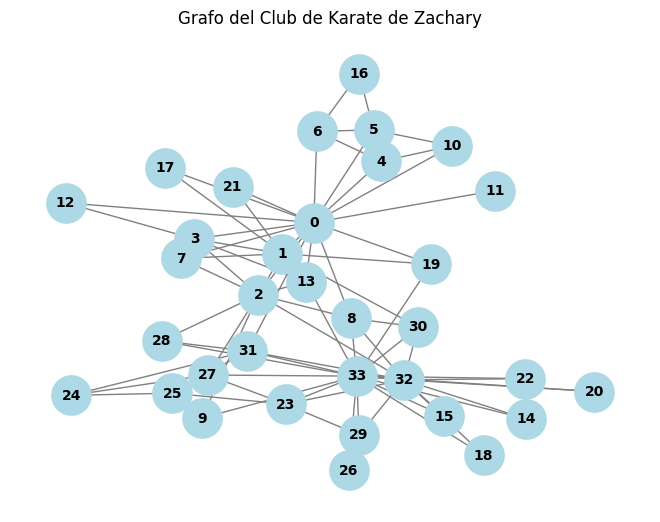

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el grafo del club de karate de Zachary
G = nx.karate_club_graph()

# Visualizar el grafo
pos = nx.spring_layout(G)  # Define la disposición de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Grafo del Club de Karate de Zachary")
plt.show()

b) Dibuja el grafo con diferentes estilos de nodos y aristas para representar la división en facciones.



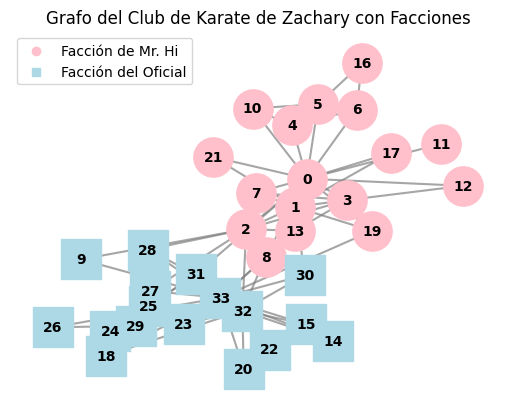

In [ ]:
# Obtener la información de la comunidad (facciones)
club_labels = nx.get_node_attributes(G, 'club')

# Asignar colores y formas a los nodos basados en la facción
node_colors = []
node_shapes = []
for node in G.nodes():
    if club_labels[node] == 'Mr. Hi':
        node_colors.append('pink')
        node_shapes.append('o')  # Círculo
    else:
        node_colors.append('lightblue')
        node_shapes.append('s')  # Cuadrado

# Dibujar el grafo con diferentes estilos
pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_colors[node], node_shape=node_shapes[node], node_size=800)

nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Añadir leyenda para las facciones
plt.scatter([], [], color='pink', marker='o', label='Facción de Mr. Hi')
plt.scatter([], [], color='lightblue', marker='s', label='Facción del Oficial')
plt.legend(scatterpoints=1)

plt.title("Grafo del Club de Karate de Zachary con Facciones")
plt.axis('off')  # Ocultar los ejes
plt.show()


In [ ]:
node_data = G.nodes(data=True)


c) Calcula y muestra el número de nodos y aristas del grafo.



Número de nodos: 34
Número de aristas: 78



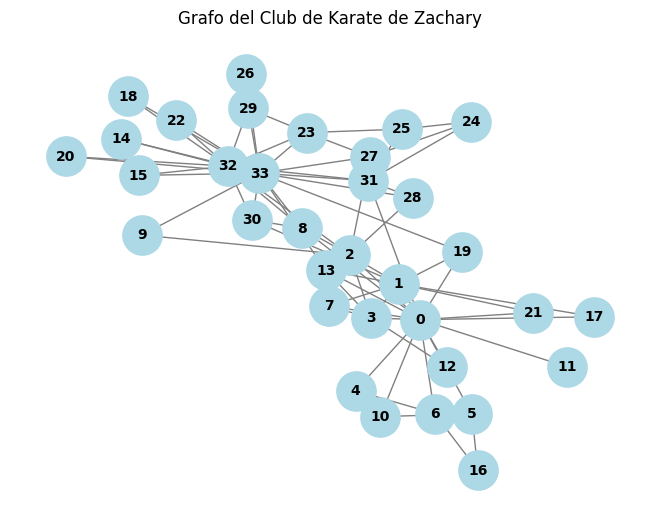

In [ ]:
# Calcular el número de nodos y aristas
num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()

# Mostrar la información
print(f"Número de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}\n")

# Visualizar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Grafo del Club de Karate de Zachary")
plt.show()

d) ¿Cuál es el grado (*degree*) medio de los nodos? ¿Qué nodo tiene mayor grado?



In [ ]:
import numpy as np

# Calcular el grado de cada nodo
degree_sequence = list(G.degree())

# Calcular el grado medio
degree_values = [d for n, d in degree_sequence]
grado_medio = np.mean(degree_values)
print(f"Grado medio de los nodos: {grado_medio:.2f}")

# Encontrar el nodo con el mayor grado
nodo_mayor_grado = max(degree_sequence, key=lambda item: item[1])
print(f"El nodo con mayor grado es el nodo {nodo_mayor_grado[0]} con un grado de {nodo_mayor_grado[1]}.")

Grado medio de los nodos: 4.59
El nodo con mayor grado es el nodo 33 con un grado de 17.


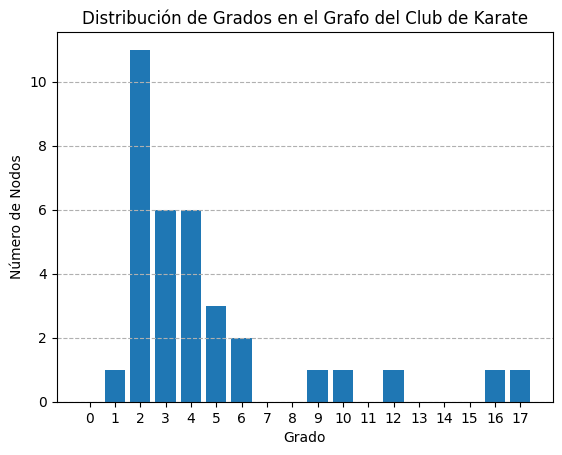

In [ ]:
# Visualizar la distribución de grados (opcional)
plt.hist(degree_values, bins=range(max(degree_values) + 2), align='left', rwidth=0.8)
plt.title("Distribución de Grados en el Grafo del Club de Karate")
plt.xlabel("Grado")
plt.ylabel("Número de Nodos")
plt.xticks(range(max(degree_values) + 1))
plt.grid(axis='y', linestyle='--')
plt.show()

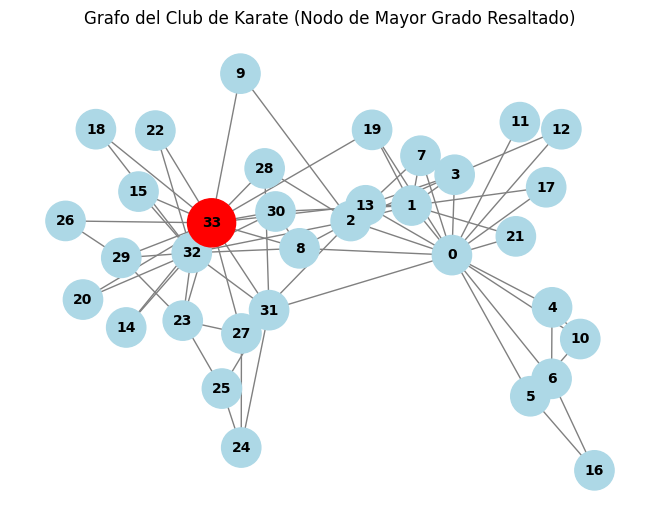

In [ ]:
# Visualizar el grafo con el nodo de mayor grado resaltado (opcional)
pos = nx.spring_layout(G)
node_colors = ['lightblue'] * G.number_of_nodes()
node_sizes = [800] * G.number_of_nodes()
# Resaltar el nodo de mayor grado en rojo y más grande
node_colors[nodo_mayor_grado[0]] = 'red'
node_sizes[nodo_mayor_grado[0]] = 1200

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Grafo del Club de Karate (Nodo de Mayor Grado Resaltado)")
plt.show()

e) Calcula las medidas de centralidad (de grado, cercanía e intermediación) para todos los nodo. Interpreta su significado en el contexto del grafo.

In [ ]:
# Calcular la centralidad de grado
degree_centrality = nx.degree_centrality(G)
print("Centralidad de Grado:")
for nodo, centralidad in degree_centrality.items():
    print(f"Nodo {nodo}: {centralidad:.4f}")

print("\n")

# Calcular la centralidad de cercanía
closeness_centrality = nx.closeness_centrality(G)
print("Centralidad de Cercanía:")
for nodo, centralidad in closeness_centrality.items():
    print(f"Nodo {nodo}: {centralidad:.4f}")

print("\n")

# Calcular la centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G)
print("Centralidad de Intermediación:")
for nodo, centralidad in betweenness_centrality.items():
    print(f"Nodo {nodo}: {centralidad:.4f}")

Centralidad de Grado:
Nodo 0: 0.4848
Nodo 1: 0.2727
Nodo 2: 0.3030
Nodo 3: 0.1818
Nodo 4: 0.0909
Nodo 5: 0.1212
Nodo 6: 0.1212
Nodo 7: 0.1212
Nodo 8: 0.1515
Nodo 9: 0.0606
Nodo 10: 0.0909
Nodo 11: 0.0303
Nodo 12: 0.0606
Nodo 13: 0.1515
Nodo 14: 0.0606
Nodo 15: 0.0606
Nodo 16: 0.0606
Nodo 17: 0.0606
Nodo 18: 0.0606
Nodo 19: 0.0909
Nodo 20: 0.0606
Nodo 21: 0.0606
Nodo 22: 0.0606
Nodo 23: 0.1515
Nodo 24: 0.0909
Nodo 25: 0.0909
Nodo 26: 0.0606
Nodo 27: 0.1212
Nodo 28: 0.0909
Nodo 29: 0.1212
Nodo 30: 0.1212
Nodo 31: 0.1818
Nodo 32: 0.3636
Nodo 33: 0.5152


Centralidad de Cercanía:
Nodo 0: 0.5690
Nodo 1: 0.4853
Nodo 2: 0.5593
Nodo 3: 0.4648
Nodo 4: 0.3793
Nodo 5: 0.3837
Nodo 6: 0.3837
Nodo 7: 0.4400
Nodo 8: 0.5156
Nodo 9: 0.4342
Nodo 10: 0.3793
Nodo 11: 0.3667
Nodo 12: 0.3708
Nodo 13: 0.5156
Nodo 14: 0.3708
Nodo 15: 0.3708
Nodo 16: 0.2845
Nodo 17: 0.3750
Nodo 18: 0.3708
Nodo 19: 0.5000
Nodo 20: 0.3708
Nodo 21: 0.3750
Nodo 22: 0.3708
Nodo 23: 0.3929
Nodo 24: 0.3750
Nodo 25: 0.3750
Nodo 26: 0.

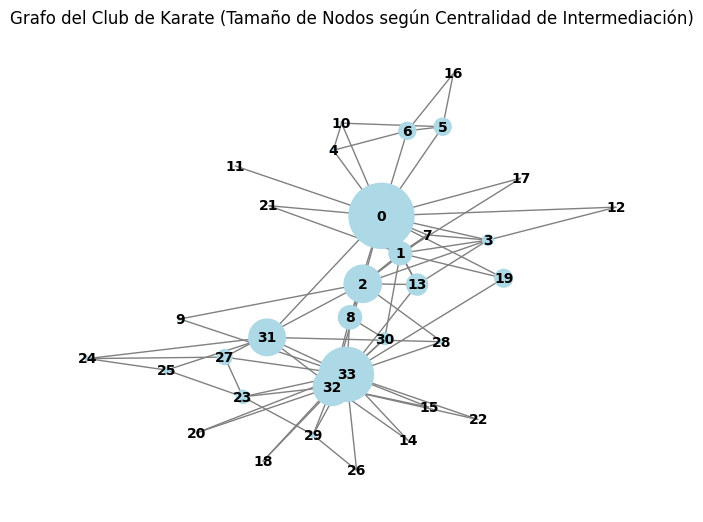

In [ ]:
# Visualizar el grafo con el tamaño de los nodos proporcional a la centralidad de intermediación (ejemplo)
pos = nx.spring_layout(G)
node_sizes = [v * 5000 for v in betweenness_centrality.values()] # Escalar para que los tamaños sean visualmente distintos

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Grafo del Club de Karate (Tamaño de Nodos según Centralidad de Intermediación)")
plt.show()

### Ejercicio 2

Ahora que ya estamos más familiarizados con los datos, vamos a detectar comunidades dentro del grafo.

a) Aplica el algoritmo de Girvan-Newman para detectar comunidades dentro del grafo.
b) Visualiza el grafo coloreando los nodos según su comunidad detectada.


Comunidades detectadas (primera división):
Comunidad 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Comunidad 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


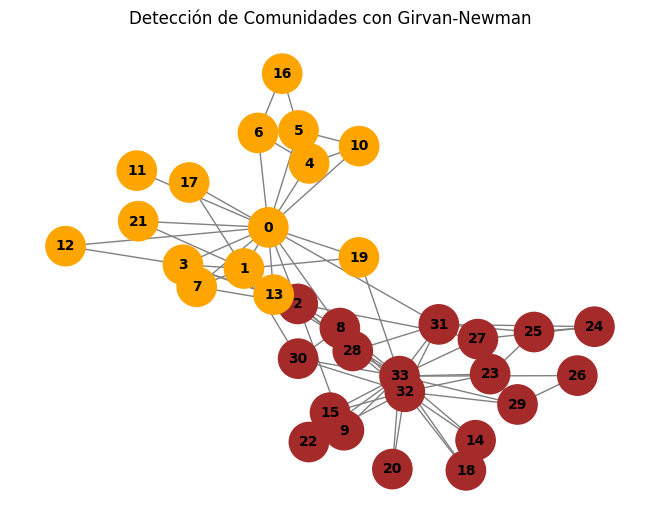

In [ ]:
from networkx.algorithms.community import girvan_newman

# Aplicar el algoritmo de Girvan-Newman
communities_generator = girvan_newman(G)

# Obtener las dos primeras particiones (correspondientes a la división en dos comunidades)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

# Convertir los conjuntos de nodos en listas para facilitar el acceso
community1 = list(sorted(top_level_communities[0]))
community2 = list(sorted(top_level_communities[1]))

print("Comunidades detectadas (primera división):")
print(f"Comunidad 1: {community1}")
print(f"Comunidad 2: {community2}")

# Asignar colores a los nodos basados en la comunidad
node_colors = ['lightblue'] * G.number_of_nodes()
for node in community1:
    node_colors[node] = 'orange'
for node in community2:
    node_colors[node] = 'brown'

# Visualizar el grafo con las comunidades coloreadas
pos = nx.spring_layout(G, seed=42)  # Seed para reproducibilidad
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Detección de Comunidades con Girvan-Newman")
plt.show()


Siguiente nivel de comunidades detectadas:
Comunidad 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Comunidad 2: [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Comunidad 3: [9]


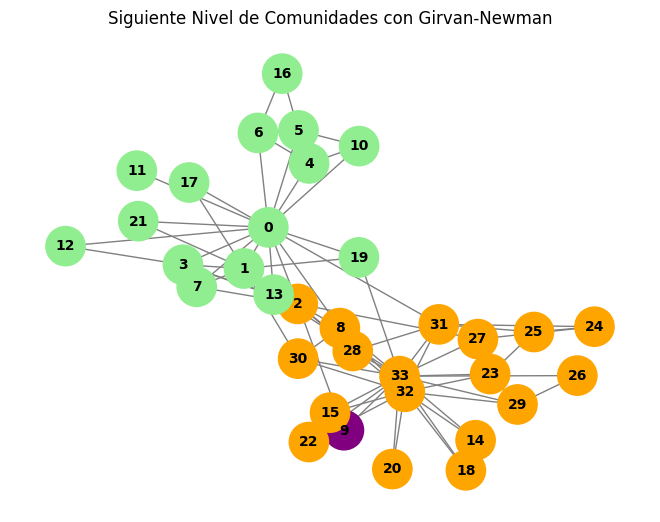

In [ ]:
# También podemos explorar la siguiente división de comunidades
print("\nSiguiente nivel de comunidades detectadas:")
for i, community in enumerate(next_level_communities):
    print(f"Comunidad {i+1}: {sorted(list(community))}")

# Visualizar el grafo con la siguiente división de comunidades (requiere más colores)
if len(next_level_communities) <= 4:
    community_colors_next = ['lightgreen', 'orange', 'purple', 'yellow']
    node_colors_next = ['gray'] * G.number_of_nodes()
    for i, community in enumerate(next_level_communities):
        for node in community:
            node_colors_next[node] = community_colors_next[i]

    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color=node_colors_next, node_size=800, font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Siguiente Nivel de Comunidades con Girvan-Newman")
    plt.show()
else:
    print("\nDemasiadas comunidades en el siguiente nivel para una visualización clara con los colores definidos.")

### Ejercicio 3

A continuación, vamos a analizar los caminos y la connectividad dentro del grafo.

a) Encuentra la distancia mínima entre dos nodos dados utilizando el camino más corto.



In [ ]:
nodo_inicial = 0
nodo_final = 33

try:
    camino_corto = nx.shortest_path(G, source=nodo_inicial, target=nodo_final)
    distancia_minima = nx.shortest_path_length(G, source=nodo_inicial, target=nodo_final)
    print(f"a) Distancia mínima entre el nodo {nodo_inicial} y el nodo {nodo_final}: {distancia_minima}")
    print(f"   Camino más corto: {camino_corto}")
except nx.NetworkXNoPath:
    print(f"a) No existe un camino entre el nodo {nodo_inicial} y el nodo {nodo_final}.")

print("\n")

a) Distancia mínima entre el nodo 0 y el nodo 33: 2
   Camino más corto: [0, 8, 33]




b) Calcula el coeficiente de clustering del grafo y comenta su significado.


In [ ]:
clustering_global = nx.average_clustering(G)
print(f"b) Coeficiente de clustering del grafo: {clustering_global:.4f}")
print("""
   El coeficiente de clustering global mide la tendencia de los nodos en un grafo a agruparse.
   Representa la proporción de tripletes cerrados (donde tres nodos están conectados entre sí)
   sobre el número total de tripletes posibles (tanto abiertos como cerrados).

   Un coeficiente de clustering alto (cercano a 1) indica que el grafo tiene una alta densidad
   de triángulos, lo que sugiere una fuerte cohesión local y la presencia de muchos grupos
   de nodos que están densamente interconectados.

   En el contexto de una red social como el club de karate, un coeficiente de clustering
   relativamente alto sugeriría que los miembros del club tienden a formar grupos cerrados
   de amigos o conocidos, donde si una persona conoce a otras dos dentro del grupo, es
   probable que esas dos también se conozcan entre sí.
""")

b) Coeficiente de clustering del grafo: 0.5706

   El coeficiente de clustering global mide la tendencia de los nodos en un grafo a agruparse.
   Representa la proporción de tripletes cerrados (donde tres nodos están conectados entre sí)
   sobre el número total de tripletes posibles (tanto abiertos como cerrados).

   Un coeficiente de clustering alto (cercano a 1) indica que el grafo tiene una alta densidad
   de triángulos, lo que sugiere una fuerte cohesión local y la presencia de muchos grupos
   de nodos que están densamente interconectados.

   En el contexto de una red social como el club de karate, un coeficiente de clustering
   relativamente alto sugeriría que los miembros del club tienden a formar grupos cerrados
   de amigos o conocidos, donde si una persona conoce a otras dos dentro del grupo, es
   probable que esas dos también se conozcan entre sí.



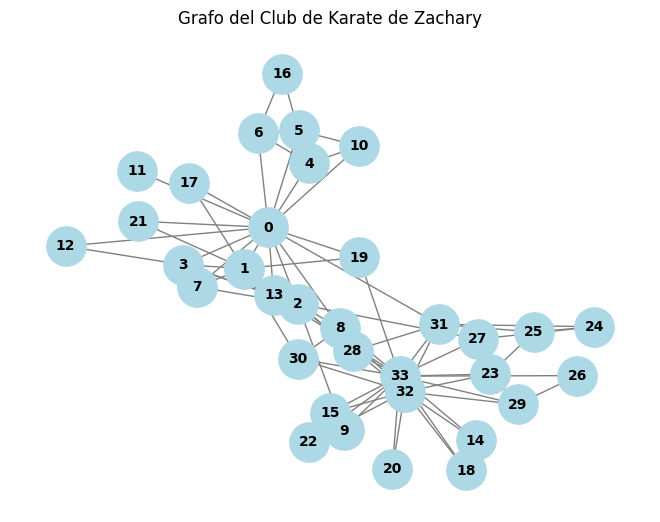

In [ ]:
# Visualizar el grafo (opcional)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Grafo del Club de Karate de Zachary")
plt.show()